# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacobeckhardt/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
api_key = os.getenv("news_api")


32

In [9]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [25]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='Bitcoin',
                                  language='en',
                                  sort_by='relevancy')

btc_news['totalResults']

8397

In [26]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='Ethereum',
                                  language='en',
                                  sort_by='relevancy')

eth_news['totalResults']

2898

In [27]:
# Create the Bitcoin sentiment scores DataFrame
btc_sent = []

for article in btc_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sent.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass

In [28]:
btc_df = pd.DataFrame(btc_sent)

cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
2,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
4,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879


In [29]:
# Create the Ethereum sentiment scores DataFrame
eth_sent = []

for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sent.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass

In [30]:
eth_df = pd.DataFrame(eth_sent)

cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [31]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.193850,0.061850,0.008950,0.929200
std,0.292815,0.074301,0.028858,0.072028
min,-0.273200,0.000000,0.000000,0.781000
25%,0.000000,0.000000,0.000000,0.882750
50%,0.012900,0.016500,0.000000,0.930500
75%,0.467575,0.107500,0.000000,1.000000
max,0.726900,0.219000,0.116000,1.000000


In [32]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.206370,0.044350,0.002400,0.953250
std,0.297927,0.066664,0.010733,0.071224
min,0.000000,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.905250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.475775,0.094750,0.000000,1.000000
max,0.822500,0.208000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum has the highest max compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest max positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [33]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Make all the words lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Remove stopwords
    words = list(filter(lambda s: s.lower() not in sw, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [36]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ul, li, Bitcoin, term, market, value, rose, 4..."
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, Walmart, ..."
2,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[JPMorgan, CEO, Jamie, Dimon, still, Bitcoin, ..."
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, Bitcoin, sustaining, gain, push..."
4,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[Specifically, someone, make, massive, purchas..."


In [38]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, cross-chain, bridge, currently, connecte..."
1,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[Mark, Cuban, advice, people, new, investing, ..."
2,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[Ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[Elon, Musk, picture, alliance, Getty, Images,..."
4,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[Cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [39]:
from collections import Counter
from nltk import ngrams

In [40]:
# Generate the Bitcoin N-grams where N=2
grams = ngrams(tokenizer(btc_df.text.str.cat()), 2)
Counter(grams).most_common(10)

[(('Reuters', 'Bitcoin'), 5),
 (('cryptocurrency', 'Bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('U.Today', 'http'), 3),
 (('char', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3),
 (('Bitcoin', 'seen'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3)]

In [41]:
# Generate the Ethereum N-grams where N=2
grams = ngrams(tokenizer(eth_df.text.str.cat()), 2)
Counter(grams).most_common(10)

[(('Bitcoin', 'Ethereum'), 4),
 (('illustration', 'taken'), 4),
 (('Getty', 'Images'), 3),
 (('taken', 'June'), 3),
 (('cross-chain', 'bridge'), 2),
 (('Elon', 'Musk'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('char', 'Representations'), 2),
 (('Representations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'Bitcoin'), 2)]

In [42]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [43]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(btc_df.text.str.cat())
token_count(btc_tokens, 10)

[('Bitcoin', 18),
 ('char', 16),
 ('http', 6),
 ('Reuters', 6),
 ('…', 5),
 ('bitcoin', 5),
 ('2021', 5),
 ('high', 4),
 ('U.S.', 4),
 ('cryptocurrency', 4)]

In [44]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(eth_df.text.str.cat())
token_count(eth_tokens, 10)

[('char', 20),
 ('Ethereum', 10),
 ('Bitcoin', 9),
 ('…', 8),
 ('cryptocurrency', 8),
 ('Images', 5),
 ('2021', 4),
 ('illustration', 4),
 ('taken', 4),
 ('ethereum', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

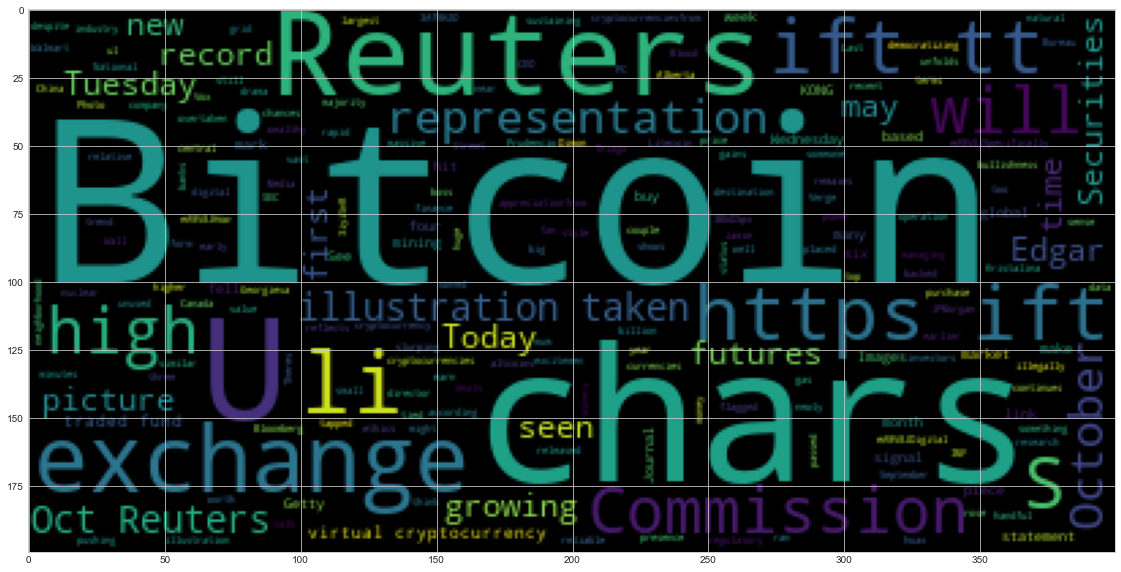

In [47]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_df.text.str.cat())
plt.imshow(wc)

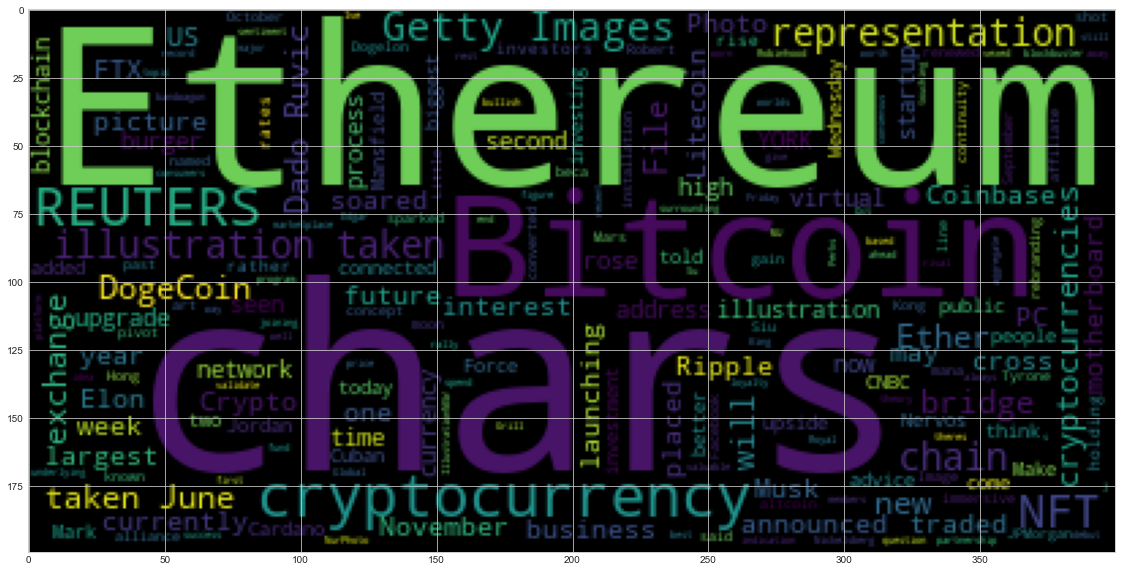

In [49]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [50]:
import spacy
from spacy import displacy

In [53]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
btc_news = btc_df.text.str.cat()
btc_news

"<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars]A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V8JHow high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8JSpecifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars]Theres a big new presence slurping up power from the U.S. grid, an

In [63]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_news)

# Add a title to the document
btc_doc.user_data['title'] = 'btc_ner'

In [64]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [65]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
chars]JPMorgan ORG
Jamie Dimon PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
SEC ORG
two CARDINAL
IMF ORG
Kristalina Georgieva PERSON
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters OR

---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
eth_news = eth_df.text.str.cat()

In [67]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_news)

# Add a title to the document
eth_doc.user_data['title'] = 'eth_ner'

In [68]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [70]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Cuban NORP
CNBC ORG
Wednesday DATE
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
Ethereum GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Il

---